<h2>Hệ thống Base Plotting</h2>

Hệ thống đầu tiên là Base Plotting. Đây là hệ thống có mặt sớm nhất trong R và được sử dụng như là "Bảng màu của họa sĩ". Điều này có nghĩa là ta sẽ bắt đầu với một tờ giấy trắng. Sau đó, ta sẽ từ từ vẽ các thông tin biểu đồ lên tờ giấy này.

Thông thường, ta sẽ bắt đầu với hàm plot(). Sau đó, ta sẽ thêm các ghi chú lên đó. R cung cấp các hàm ghi chú lên biểu đồ như text(), lines(), points(), và axis(). Nhược điểm của hệ thống plotting này đó là ta không thể phục hồi lại lệnh trước đó nếu đã lỡ xuất ra rồi.

Ta sẽ khảo sát và plot() tập dữ liệu cars. Tập dữ liệu này cho biết thông tin quan hệ giữa khoảng cách để dừng một chiếc xe với một tốc độ cho trước. Tập dữ liệu được thu thập từ những năm 1920.


In [1]:
# install.packages("ggplot2")
# install.packages("jpeg")
library(ggplot2)
library(jpeg)
library(lattice)
library(datasets)
library(repr)
options(repr.plot.width=4, repr.plot.height=4)

data(cars)
data(mpg)
data(state)

In [2]:
head(cars)

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


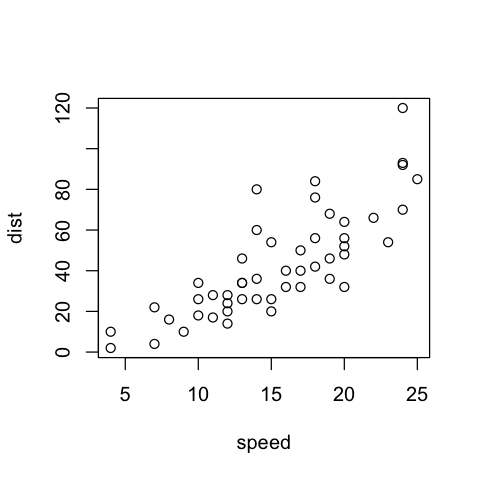

In [3]:
# plot tập dữ liệu cars ra màn hình
with(cars, plot(speed, dist))

Đơn giản phải không nào. Ta có thể quan sát được mối quan hệ giữa hai biến speed và distance. Biến thứ nhất biểu diễn theo trục x, biến còn lại biểu diễn theo trục y.

Kế tiếp, ta sẽ ghi chú thêm thông tin bằng hàm text().


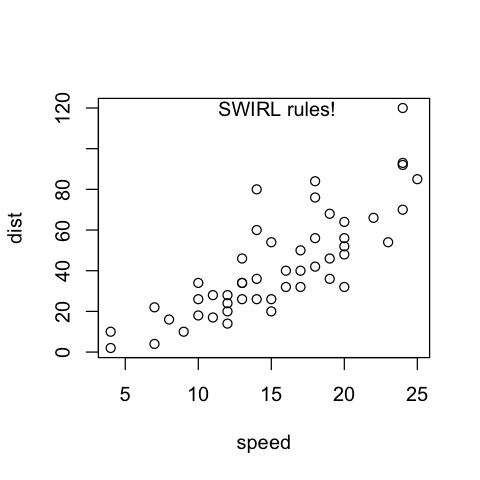

In [4]:
with(cars, plot(speed, dist))
text(mean(cars$speed),max(cars$dist),"SWIRL rules!")

<h2>Hệ thống Latice</h2>

Bây giờ, ta sẽ chuyển sang hệ thống plotting thứ hai, hệ thống Lattice. Không như Base, Lattice biểu diễn biểu đồ chỉ bằng một hàm duy nhất như xyplot() hay bwplot(). Khoảng cách biên sẽ được tự động canh chỉnh. Hệ thống này đặc biệt hữu dụng khi ta muốn quan sát mối quan hệ giữa biến x và y khi đặt trong mục z. Ngoài ra, hệ thống này cũng được sử dụng để hiển thị nhiều biểu đồ cùng lúc.

Hạn chế của Lattice đó là ta chỉ được phép gọi hàm plot một lần và không được quyền thêm các ghi chú như Base. Ta lấy ví dụ tập dữ liệu của 50 tiểu bang của US.



In [5]:
state <- data.frame(state.x77, region = state.region)
head(state)

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,region
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708,South
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432,West
Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417,West
Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945,South
California,21198,5114,1.1,71.71,10.3,62.6,20,156361,West
Colorado,2541,4884,0.7,72.06,6.8,63.9,166,103766,West


Như chúng ta có thể thấy, state chứa 9 mẫu thông tin cho 50 tiểu bang của US. Biến cuối cùng là region cho ta biết phân vùng của từng tiểu bang. Ta dùng hàm table để xem US có bao nhiêu vùng.


In [6]:
table(state$region)


    Northeast         South North Central          West 
            9            16            12            13 

Như vậy ở US có 4 vùng và 50 tiểu bang được sắp trong các phân vùng này. Ta dùng hàm xyplot() của Lattice để biểu diễn mối quan hệ giữa Life.Exp và Income trên 4 phân vùng này.


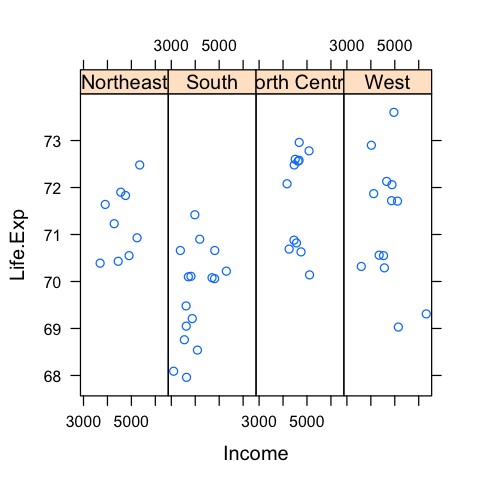

In [7]:
xyplot(Life.Exp ~ Income | region, data = state, layout = c(4, 1))

Ở biểu đồ trên, ta thấy dữ liệu được biểu diễn tương ứng với 4 vùng trên cùng một dòng. Dựa vào biểu đồ trên, ta có thể xác định được vùng phía Nam có mức sống thấp nhất.

Ta có thể layout lại biểu đồ trên như sau


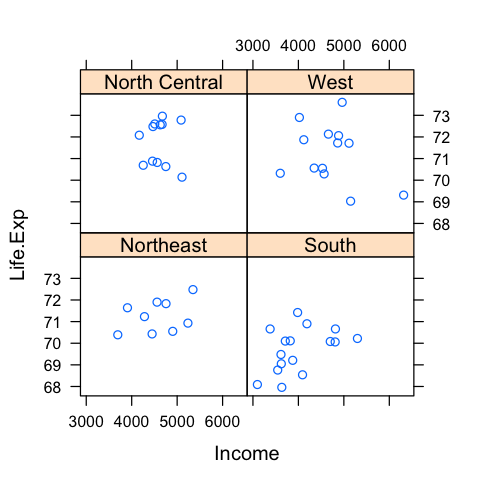

In [8]:
xyplot(Life.Exp ~ Income | region, data = state, layout = c(2,2))

Ta có thể thấy mọi ghi chú hay layout đều được Lattice tự động hiệu chỉnh mà không cần ta phải động tay vào.

<h2>Hệ thống ggplot2</h2>

Hệ thống plotting cuối cùng là ggplot2. Đây là hệ thống kết hợp cả hai ưu điểm của hệ thống base và lattice. Ta có thể tự động hóa việc layout cũng như hiệu chỉnh được thông tin ghi chú sau khi đã xuất biểu đồ ra màn hình.

Mặc dù ggplot2 khá giống với lattice nhưng lại dễ sử dụng và dễ hình dung hơn. Ta có thể hiệu chỉnh lại các giá trị mặc định của nó. gg là viết tắt của "grammar of graphics". Ta có thể điều khiển được mặt hiển thị của biểu đồ.

Ta lấy ví dụ với tập dữ liệu mpg. Tập dữ liệu cung cấp thông tin về nhiên liệu của các mẫu xe từ năm 1999 và 2008. Ta tiến hành quan sát tập dữ liệu này


In [9]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [10]:
dim(mpg)

[1] 234  11

Để biết được có bao nhiêu mẫu xe trong tập dữ liệu, ta dùng hàm table() để thống kê trên thuộc tính mpg$model.

In [11]:
print(table(mpg$model))


           4runner 4wd                     a4             a4 quattro 
                     6                      7                      8 
            a6 quattro                 altima     c1500 suburban 2wd 
                     3                      6                      5 
                 camry           camry solara            caravan 2wd 
                     7                      7                     11 
                 civic                corolla               corvette 
                     9                      5                      5 
     dakota pickup 4wd            durango 4wd         expedition 2wd 
                     9                      7                      3 
          explorer 4wd        f150 pickup 4wd           forester awd 
                     6                      7                      6 
    grand cherokee 4wd             grand prix                    gti 
                     8                      5                      5 
           impreza 

Ta có 38 mẫu xe qua thống kê trên. Ta muốn quan sát mối quan hệ giữa dung tích động cơ và nhiên liệu tiêu thụ. Do đó, ta dùng hàm qplot() để biểu diễn mối quan hệ này.


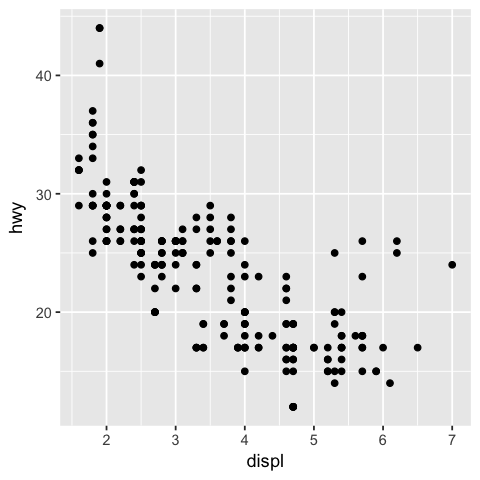

In [12]:
qplot(displ, hwy, data = mpg)

Không có gì đáng ngạc nhiên khi quan sát biểu đồ trên. Ta thấy dung tích động cơ càng lớn thì tiết kiệm nhiên liệu càng ít.

Qua bài viết trên, ta đã làm quen với ba hệ thống plotting cơ bản (base plotting, lattice, và ggplot2).

<strong>Nguồn tham khảo:</strong> <a href="http://swirlstats.com/" target="_blank" rel="noopener">http://swirlstats.com/</a>